Lab 2 Assignment- Simple Linear regression
Bengaluru Housing Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


In [ ]:
#Loading the data
df= pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


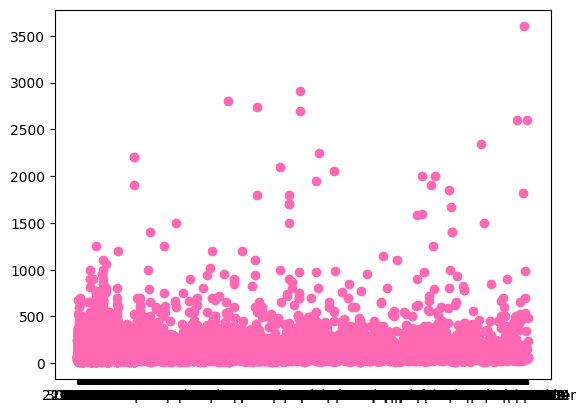

In [ ]:
plt.scatter(df['total_sqft'],df['price'], color='hotpink')
plt.show()

In [ ]:
col = df[['total_sqft','price']].copy()
col

,total_sqft,price
0,1056,39.07
1,2600,120.00
2,1440,62.00
3,1521,95.00
4,1200,51.00
...,...,...
13315,3453,231.00
13316,3600,400.00
13317,1141,60.00
13318,4689,488.00


Exercise-2 Data Preprocessing

In [ ]:
#data prepocessing
#removing two columns
cols =['society','balcony']
df = df.drop(cols, axis=1)

In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [ ]:
df['total_sqft']= pd.to_numeric(df['total_sqft'], errors='coerce')

In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689.0,4.0,488.00


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
col.isnull().sum()

total_sqft    0
price         0
dtype: int64

In [ ]:
df.describe()


,total_sqft,bath,price
count,13073.000000,13247.000000,13320.000000
mean,1554.942029,2.692610,112.565627
std,1238.458773,1.341458,148.971674
min,1.000000,1.000000,8.000000
25%,1100.000000,2.000000,50.000000
50%,1275.000000,2.000000,72.000000
75%,1670.000000,3.000000,120.000000
max,52272.000000,40.000000,3600.000000


In [ ]:
new=df.drop(['bath','area_type','availability','location','size'], axis=1)


In [ ]:
new

,total_sqft,price
0,1056.0,39.07
1,2600.0,120.00
2,1440.0,62.00
3,1521.0,95.00
4,1200.0,51.00
...,...,...
13315,3453.0,231.00
13316,3600.0,400.00
13317,1141.0,60.00
13318,4689.0,488.00


In [ ]:
new.isnull().sum()

total_sqft    247
price           0
dtype: int64

In [ ]:
new_df = (new - new.mean()) / new.std()
new_df


,total_sqft,price
0,-0.402873,-0.493353
1,0.843838,0.049905
2,-0.092811,-0.339431
3,-0.027407,-0.117913
4,-0.286600,-0.413271
...,...,...
13315,1.532597,0.795013
13316,1.651293,1.929457
13317,-0.334240,-0.352857
13318,2.530611,2.520173


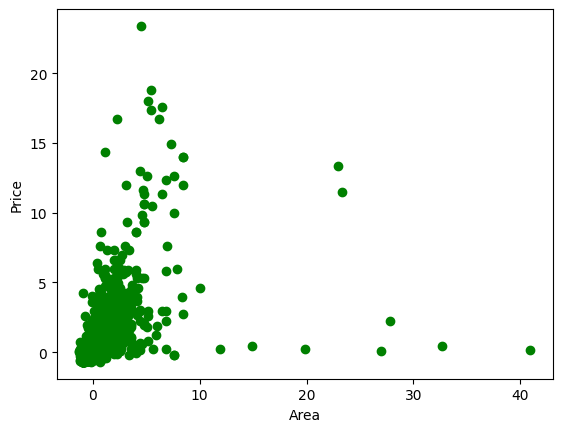

In [ ]:
plt.scatter(new_df['total_sqft'], new_df['price'], color='green')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

EXERCISE-3: Perform gradient descent

In [ ]:
#new_df.isnull().sum()

total_sqft    247
price           0
dtype: int64

In [ ]:
#new_df.dropna(subset=['total_sqft'],inplace=True)

In [ ]:
X = new_df.iloc[:,0]
X

0       -0.402873
1        0.843838
2       -0.092811
3       -0.027407
4       -0.286600
           ...   
13315    1.532597
13316    1.651293
13317   -0.334240
13318    2.530611
13319   -0.811446
Name: total_sqft, Length: 13073, dtype: float64

In [ ]:
Y = new_df.iloc[:,1]
Y

0       -0.493353
1        0.049905
2       -0.339431
3       -0.117913
4       -0.413271
           ...   
13315    0.795013
13316    1.929457
13317   -0.352857
13318    2.520173
13319   -0.641502
Name: price, Length: 13073, dtype: float64

In [ ]:
# Building the model
Theta_0 = 0
Theta_1 = 0
L = 0.001 # Learning rate
epochs = 1000 # The number of iterations
n = float(len(X))
for i in range(epochs):
  Y_pred = Theta_1 * X + Theta_0
  D_Theta_1 = (-2/n) * sum(X * (Y - Y_pred))
  D_Theta_0 = (-2/n) * sum(Y - Y_pred)
  Theta_1 = Theta_1 - L * D_Theta_1
  Theta_0 = Theta_0 - L * D_Theta_0

print("Theta0:", Theta_0)
print("Theta1:", Theta_1)


Theta0: -0.00021590014593158565
Theta1: 0.497867422366539


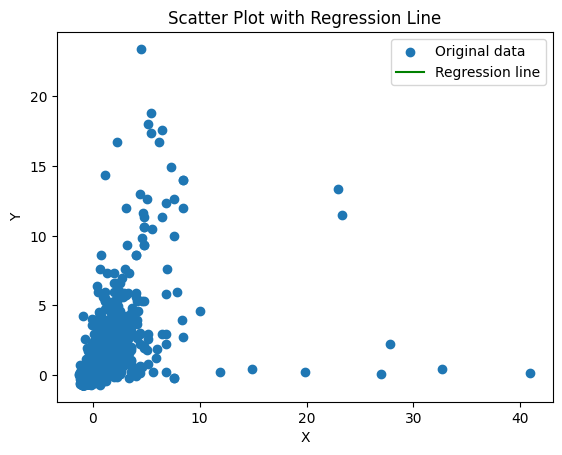

In [ ]:
regression = Theta_1 * X + Theta_0
# Scatter plot
plt.scatter(X, Y, label="Original data")
plt.plot(X, regression, color='green', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.show()


In [ ]:
# Performing gradient descent using the library
x = new_df[['total_sqft']].values
y = new_df['price'].values
model = LinearRegression()
model.fit(x,y)
theta0 = model.intercept_
theta1 = model.coef_[0]
print("Theta0:", theta0)
print("Theta1:", theta1)


Theta0: -0.00024961416375509705
Theta1: 0.5756259909189845


EXERCISE-4: Splitting data into the training and
testing, 60:40, 70:30, ND 80:20

In [ ]:
x

array([[-0.40287335],
       [ 0.84383751],
       [-0.09281054],
       ...,
       [-0.33423965],
       [ 2.53061147],
       [-0.81144569]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4)

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, train_size=0.8, test_size=0.2)

EXERCISE-5: Train linear regression model and test
USING Gradient Descent and using the library. Find
out the limitation in both cases

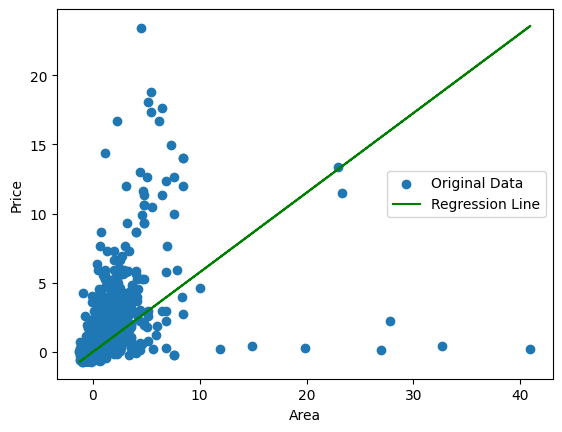

In [ ]:
regression2=theta1 *X + theta0
plt.scatter(x,y,label="Original Data")
plt.plot(x,regression2, color='green',label='Regression Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()


In [ ]:
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
print(model.coef_)


[0.52712219]


In [ ]:
x_train

array([[-0.08473599],
       [-0.33504711],
       [-0.28659979],
       ...,
       [-0.3875317 ],
       [-0.22765556],
       [-0.27045069]])

In [ ]:
predictions = model.predict(x_test)


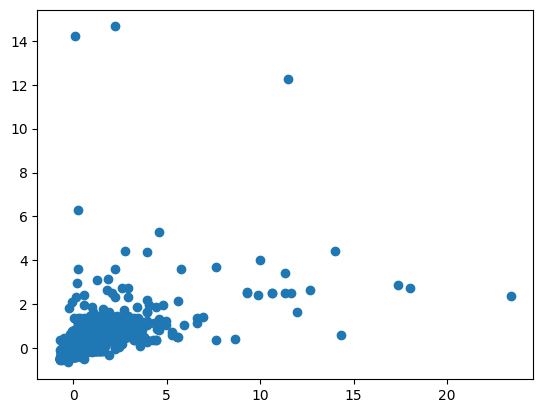

In [ ]:
plt.scatter(y_test, predictions)


(array([2.000e+00, 0.000e+00, 1.000e+00, 3.620e+03, 1.564e+03, 2.800e+01,
        1.100e+01, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([-14.11511237, -10.60043774,  -7.0857631 ,  -3.57108847,
         -0.05641383,   3.4582608 ,   6.97293544,  10.48761007,
         14.00228471,  17.51695934,  21.03163398]),
 <BarContainer object of 10 artists>)

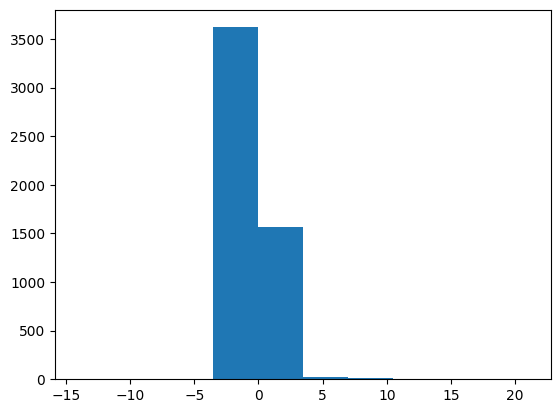

In [ ]:
plt.hist(y_test - predictions)


Mean Absolute Error: 0.35461075959741106
Mean Squared Error: 0.7556810580458726
Root Mean Squared Error: 0.869299176374781
R-squared: 0.35056457010663145


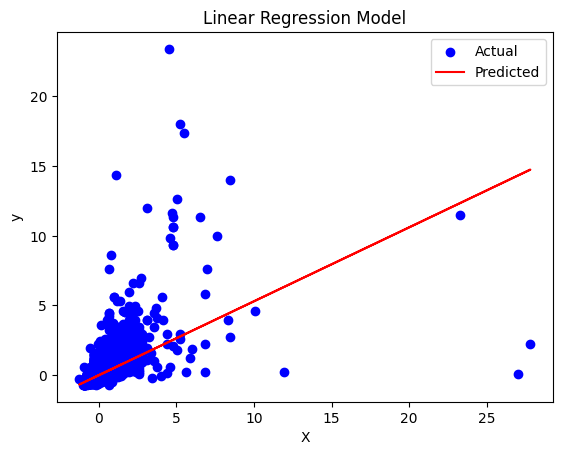

In [ ]:
from sklearn. linear_model import LinearRegression
from sklearn. metrics import mean_absolute_error, mean_squared_error,r2_score

model = LinearRegression ()
model. fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print ("Mean Absolute Error:", mae)
print ("Mean Squared Error:", mse)
print ("Root Mean Squared Error:", rmse)
print ("R-squared:", r2)
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.xlabel ('X')
plt.ylabel ('y')
plt.title('Linear Regression Model')
plt.legend ()
plt.show ()

Mean Absolute Error: 0.3345705029131639
Mean Squared Error: 0.593078954191187
Root Mean Squared Error: 0.7701161952531494
R-squared: 0.36978435726437675


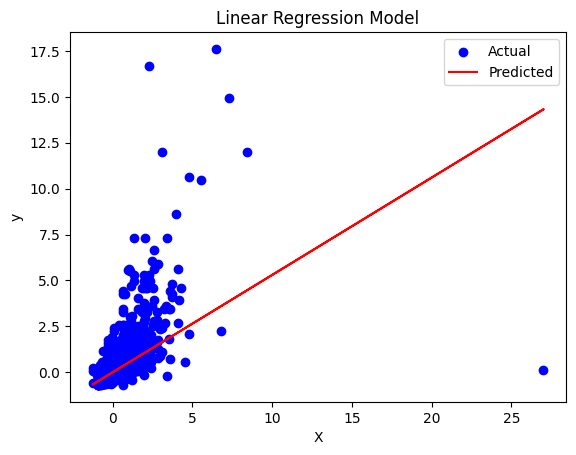

In [ ]:
from sklearn. linear_model import LinearRegression
from sklearn. metrics import mean_absolute_error, mean_squared_error,r2_score

model_70= LinearRegression()
model_70.fit(x_train1, y_train1)
y_pred_70 = model.predict(x_test1)
mae_70 = mean_absolute_error(y_test1, y_pred_70)
mse_70 = mean_squared_error(y_test1, y_pred_70)
rmse_70 = np.sqrt(mse_70)
r2_70 = r2_score(y_test1, y_pred_70)
print ("Mean Absolute Error:", mae_70)
print ("Mean Squared Error:", mse_70)
print ("Root Mean Squared Error:", rmse_70)
print ("R-squared:", r2_70)
plt.scatter(x_test1, y_test1, color='blue', label='Actual')
plt.plot(x_test1, y_pred_70, color='red', label='Predicted')
plt.xlabel ('X')
plt.ylabel ('y')
plt.title('Linear Regression Model')
plt.legend ()
plt.show ()

Mean Absolute Error: 0.3460357382278513
Mean Squared Error: 0.7428995956266088
Root Mean Squared Error: 0.861916234692565
R-squared: 0.11350337170579361


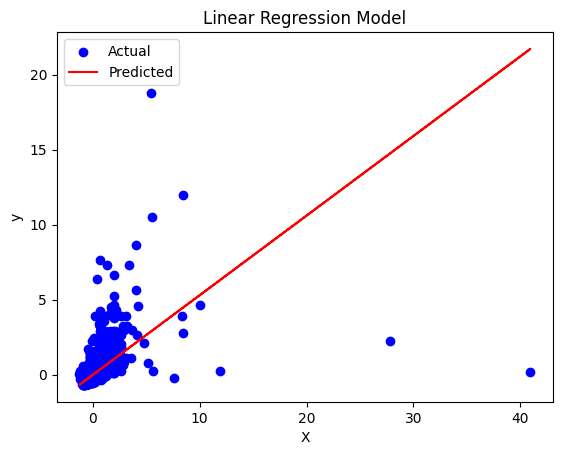

In [ ]:
from sklearn. linear_model import LinearRegression
from sklearn. metrics import mean_absolute_error, mean_squared_error,r2_score

model_80= LinearRegression()
model_80.fit(x_train2, y_train2)
y_pred_80 = model.predict(x_test2)
mae_80 = mean_absolute_error(y_test2, y_pred_80)
mse_80 = mean_squared_error(y_test2, y_pred_80)
rmse_80 = np.sqrt(mse_80)
r2_80 = r2_score(y_test2, y_pred_80)
print ("Mean Absolute Error:", mae_80)
print ("Mean Squared Error:", mse_80)
print ("Root Mean Squared Error:", rmse_80)
print ("R-squared:", r2_80)
plt.scatter(x_test2, y_test2, color='blue', label='Actual')
plt.plot(x_test2, y_pred_80, color='red', label='Predicted')
plt.xlabel ('X')
plt.ylabel ('y')
plt.title('Linear Regression Model')
plt.legend ()
plt.show ()